### 7. custom FFNN
#### 1) 활성화함수가 있는 FFNN
활성화 함수가 있는 FFNN를 구현해 보자.
$$\begin{aligned}
s &= x \cdot w + b \\
\hat y &= f(s) \\
e &= (\hat y - y)^2 \\ 
& \\
\cfrac {\partial e}{\partial w} &= \cfrac{\partial e}{\partial \hat y} \cfrac{\partial \hat y}{\partial s} \cfrac{\partial s}{\partial w} \\
&= x^T \cdot 2(\hat y - y)f^{'}(s)\\
\cfrac {\partial e}{\partial b} &= 1 \cdot 2(\hat y - y)f^{'}(s) \\
(p, o=1) &= (B, p)^T \cdot [(B, 1) \times (B, 1)]
\end{aligned}$$
- p: 변수의 수
- o: 출력의 수
- B: batch size

참고로:
$$\begin{aligned}
f(x) &= \tanh(x) \\
f^{'}(x) &= 1 - \tanh^2(x)
\end{aligned}$$

이를 위해 propagate_forward(self, x)함수를 구해보자.

In [1]:
%matplotlib inline
import numpy as np

x_train = np.random.rand(1024, 1)
y_train = x_train * 0.1 - 0.05

x_val = np.random.rand(32).reshape(-1,1)
y_val = x_val * 0.1 - 0.05

x_test = np.arange(0, 10, 2).reshape(-1,1)*.1
y_test = x_test * 0.1 - 0.05

In [11]:
class FFNN:
    def __init__(self, lr=0.01):
        self.lr = lr
        # initial weights: w는 .5, b는 .0
        self.w = np.array([0.5]).reshape(-1, 1)
        self.b = np.array([0.])
        
    def calc_sum(self, x, w, b):
        return np.dot(x, w) + b
    
    # feed forward network
    def predict(self, x):
        return np.tanh(self.calc_sum(x, self.w, self.b))
    
    # train for one batch. x 자체가 batch
    def train_on_batch(self, x, y, istrain=True):
        s = self.calc_sum(x, self.w, self.b)
        Y = self.predict(x)
        N = x.shape[0]
        loss = 1/2 * np.sum((Y - y)**2)
        if istrain:
            dw = 1/N * x.T.dot((Y - y) * (1 - np.tanh(s)**2))
            db = 1/N * np.sum((Y - y) * (1 - np.tanh(s)**2))
            self.w -= self.lr * dw
            self.b -= self.lr * db
        return loss
    
    def fit(self, x, y, batch_size=16, epochs=100, val_data=None):
        Losses = {}
        Losses["train_loss"] = []
        if val_data is not None:
            Losses["val_loss"] = []
        
        for i in range(epochs):
            Loss = 0
            N = x.shape[0]
            for j in range(0, N, batch_size):
                x_batch = x[j:j+batch_size]
                y_batch = y[j:j+batch_size]
                n = x_batch.shape[0]
                Loss += (self.train_on_batch(x_batch, y_batch) / n)
        
            print("Train Loss at Epoch %d is %.8f" %(i, Loss))
            Losses["train_loss"].append(Loss)
            if val_data is not None:
                val_N = val_data[0].shape[0]
                val_loss = self.train_on_batch(*val_data, istrain=False) / val_N
                print("Val Loss at Epoch %d is %.8f" %(i, val_loss))
                Losses["val_loss"].append(val_loss)
                
        return Losses

In [23]:
model = FFNN(lr=.1)

In [24]:
hist = model.fit(x_train, y_train, val_data=(x_val, y_val))

Train Loss at Epoch 0 is 0.29850869
Val Loss at Epoch 0 is 0.00128034
Train Loss at Epoch 1 is 0.07263458
Val Loss at Epoch 1 is 0.00055559
Train Loss at Epoch 2 is 0.03141583
Val Loss at Epoch 2 is 0.00023935
Train Loss at Epoch 3 is 0.01351593
Val Loss at Epoch 3 is 0.00010276
Train Loss at Epoch 4 is 0.00579843
Val Loss at Epoch 4 is 0.00004403
Train Loss at Epoch 5 is 0.00248363
Val Loss at Epoch 5 is 0.00001885
Train Loss at Epoch 6 is 0.00106283
Val Loss at Epoch 6 is 0.00000806
Train Loss at Epoch 7 is 0.00045457
Val Loss at Epoch 7 is 0.00000345
Train Loss at Epoch 8 is 0.00019436
Val Loss at Epoch 8 is 0.00000147
Train Loss at Epoch 9 is 0.00008308
Val Loss at Epoch 9 is 0.00000063
Train Loss at Epoch 10 is 0.00003551
Val Loss at Epoch 10 is 0.00000027
Train Loss at Epoch 11 is 0.00001518
Val Loss at Epoch 11 is 0.00000012
Train Loss at Epoch 12 is 0.00000649
Val Loss at Epoch 12 is 0.00000005
Train Loss at Epoch 13 is 0.00000277
Val Loss at Epoch 13 is 0.00000002
Train Loss a

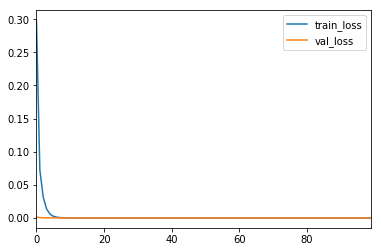

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# loss의 결과를 시각화하세요.
pd.DataFrame(hist).plot()

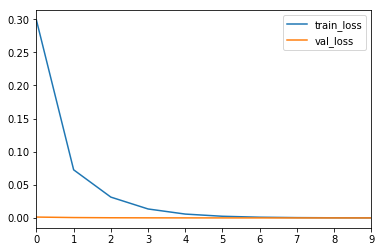

In [26]:
pd.DataFrame(hist)[:10].plot()

In [27]:
pd.DataFrame({'pred':model.predict(x_test).ravel(), 'target':y_test.ravel()})

,pred,target
0,-0.049984,-0.05
1,-0.030006,-0.03
2,-0.010005,-0.01
3,0.010004,0.01
4,0.030006,0.03


In [28]:
model.w

array([[0.10005029]])

In [29]:
model.b

array([-0.05002541])